In [1]:
import scipy.io
import pickle 
import data
import numpy as np

beta_path = "results/detm_un_K_50_Htheta_800_Optim_adam_Clip_2.0_ThetaAct_relu_Lr_0.001_Bsz_1000_RhoSize_300_L_4_minDF_30_trainEmbeddings_1_beta.mat"
# beta_path = "results/detm_un_K_50_Htheta_800_Optim_adam_Clip_2.0_ThetaAct_relu_Lr_0.0001_Bsz_200_RhoSize_300_L_4_minDF_30_trainEmbeddings_1_beta.mat"
# beta_path = './beta_100.mat'
beta = scipy.io.loadmat(beta_path)['values'] ## K x T x V
print('beta: ', beta.shape)

timestamp_path = '../data_undebates_largev/split_paragraph_0/min_df_30/timestamps.pkl'
# timestamp_path = 'un/min_df_100/timestamps.pkl'

with open(timestamp_path, 'rb') as f:
    timelist = pickle.load(f)
# print('timelist: ', timelist)

T = len(timelist)
ticks = [str(x) for x in timelist]
# print('ticks: ', ticks)

## get vocab
# data_file = 'un/min_df_100'
data_file = '../data_undebates_largev/split_paragraph_0/min_df_30'
vocab, train, valid, test = data.get_data(data_file, temporal=True)
vocab_size = len(vocab)

beta:  (50, 46, 12082)


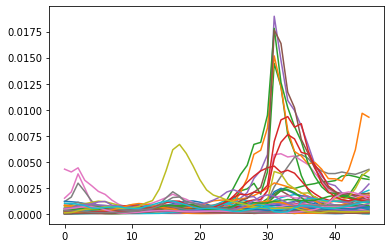

In [3]:
import matplotlib.pyplot as plt

for topic in range(beta.shape[0]):
    plt.plot(beta[topic,:,vocab.index('terrorism')])

plt.show()

In [10]:
num_words = 5
times = [0, 10, 11, 20, 30, 40]
num_topics = 50
for k in np.sum(beta[:,:,vocab.index('electricity')], axis=1).argsort()[::-1][0:4]:
    for t in times:
        gamma = beta[k, t, :]
        top_words = list(gamma.argsort()[-num_words+1:][::-1])
        topic_words = [vocab[a] for a in top_words]
        print('Topic {} .. Time: {} ===> {}'.format(k, t, topic_words)) 

Topic 11 .. Time: 0 ===> ['dialog', 'favoring', 'seventieth', 'luxembourg']
Topic 11 .. Time: 10 ===> ['assistance', 'africa', 'natural', 'crisis']
Topic 11 .. Time: 11 ===> ['africa', 'victims', 'assistance', 'terrorism']
Topic 11 .. Time: 20 ===> ['cur', 'indulge', 'virtual', 'reaped']
Topic 11 .. Time: 30 ===> ['luxembourg', 'french', 'heavily', 'france']
Topic 11 .. Time: 40 ===> ['misuse', 'healing', 'amaral', 'durban']
Topic 18 .. Time: 0 ===> ['theater', 'programs', 'reopen', 'regime']
Topic 18 .. Time: 10 ===> ['south', 'africa', 'independence', 'namibia']
Topic 18 .. Time: 11 ===> ['south', 'africa', 'independence', 'namibia']
Topic 18 .. Time: 20 ===> ['africa', 'debt', 'nobel', 'democracy']
Topic 18 .. Time: 30 ===> ['harri', 'airlines', 'pennsylvania', 'mitchell']
Topic 18 .. Time: 40 ===> ['cancún', 'durban', 'apv', 'humankind']
Topic 47 .. Time: 0 ===> ['republic', 'relations', 'disarmament', 'strengthening']
Topic 47 .. Time: 10 ===> ['republic', 'nuclear', 'soviet', 'we

In [4]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2).fit_transform(beta[:,0,:].T)


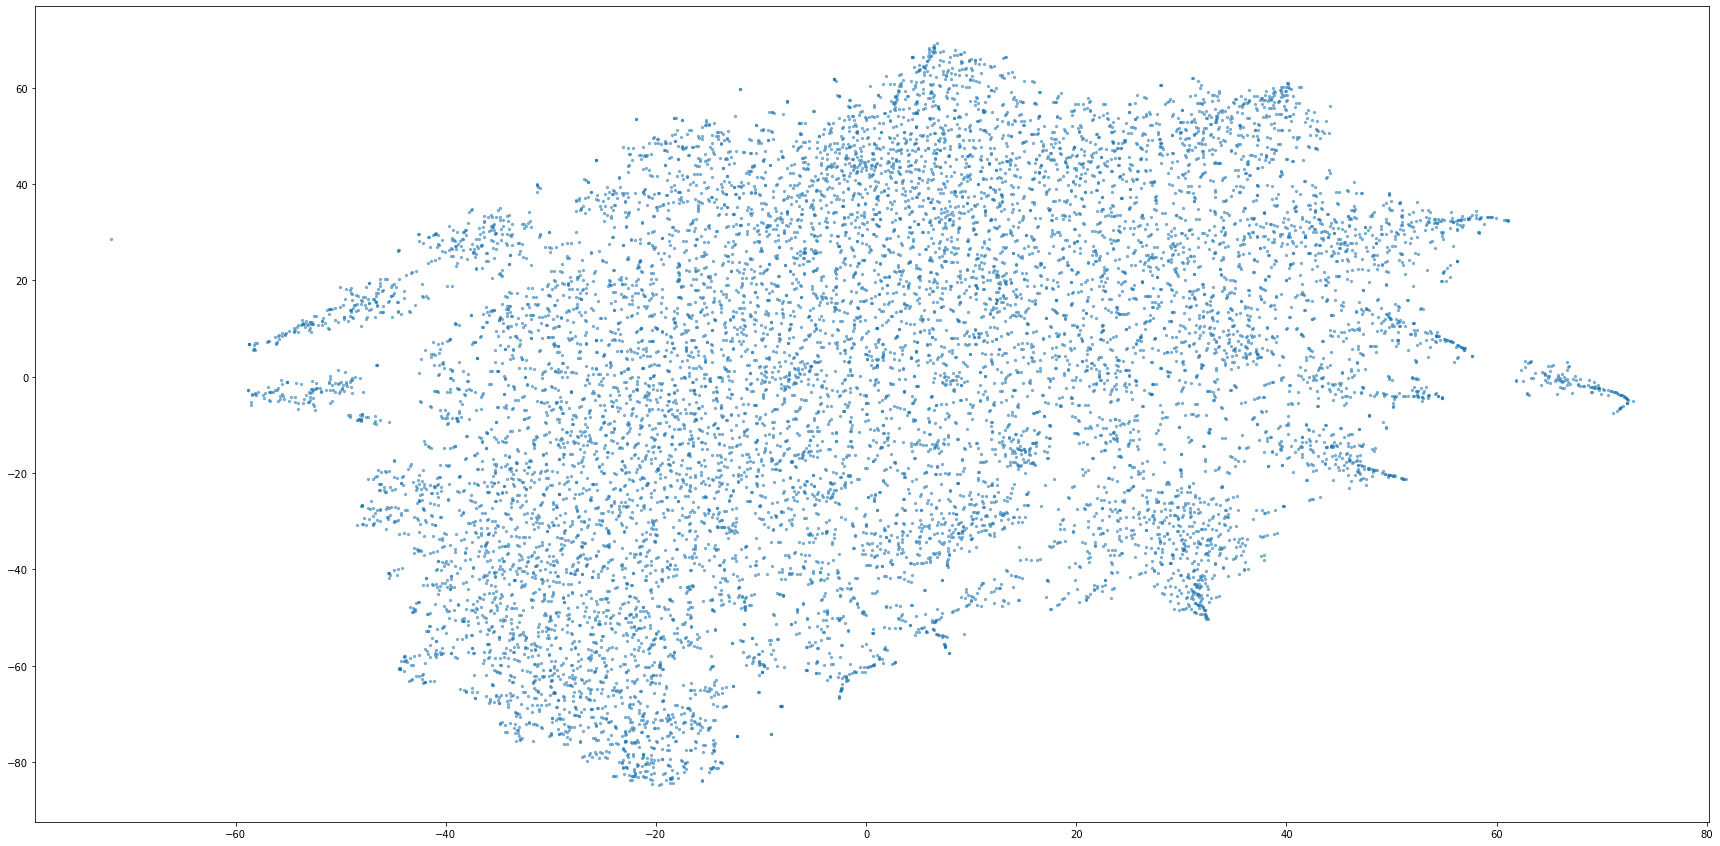

In [6]:
plt.figure(figsize=(30, 15))
plt.scatter(X[:,0], X[:,1], s=5, alpha=0.5)